In [59]:
# Models from Introduction to Algorithmic Marketing
# https://algorithmicweb.wordpress.com/
#
# Markov chain-based LTV model predicts customer lifetime value
# using the probabilities of transition between different customer states

In [1]:
%matplotlib inline
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
p1 = 0.7                # Probability of a purchase after 1 month of silence
p2 = 0.5                # Probability of a purchase after 2 months of silence
p3 = 0.3                # Probability of a purchase after 3 months of silence
r = 100                 # Revenue associated with one purchase, $
c = 5                   # Cost of one promotion
d = 0.001               # Inflation rate for one month
projection_horizon = 10 # LTV projection horizon, months

In [3]:
# Transition probabilities
P = np.matrix([
[  p1,  1-p1,   0,    0   ],
[  p2,   0,    1-p2,  0   ],
[  p3,   0,     0,   1-p3 ],
[  0,    0,     0,    0]
])

# Expected revenue
G = np.matrix([
[  r-c  ], # If customer goes to the initial state (purchases), we get the revenue minus promotion cost
[  -c   ], # If customer is silent for one month, we send promotion and lose c dollars 
[  -c   ], # If customer is silent for two months, we send promotion and lose c dollars 
[  0    ]  # If customer is silent for three month, we stop to send promotions
])

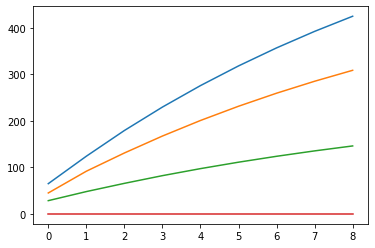

In [4]:
# Calculate and visualize the LTV. Each line on the plot corresponds to a customer state
#
# For example, the topmost line corresponds to the first state (just purchased)
# It indicates that the cumulative revenue from this cusomer is likely to grow over 
# next projection_horizon months.
#
# The bottommost line corresponds to customers who are silent for 3 months
# This customers are considred lost, so this line is constantly zero
ltv_dynamics = [
   sum( 
      (1/((1+d)**(t-1))) * (P**t)*G 
      for t in range(1, T+1)
   ) for T in range(1, projection_horizon)
]
plt.plot(np.concatenate(ltv_dynamics, axis=1).T);